# Neural Network for Handwritten Recognition, Binary

This is a model for recognizing whether a handwritten digit is 0 or 1

## Importing packages

Imports the below listed libraries
- Numpy
- Matplotlib
- Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from Load_Data.load_data import load_data

## Loads the handwritten data 

Loads the handwritten data from http://yann.lecun.com/exdb/mnist/

This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)

In [8]:
#Loads the training data
X = np.load('./Data/X.npy')
#Takes only 1000 of the training data
X = X[0:1000]
print(f'The shape of the training data is {X.shape}')

#Loads the target values
y = np.load('./Data/y.npy')
#Takes only 1000 of the target values
y = y[0:1000]
print(f'The shape of the target values is {y.shape}')

The shape of the training data is (1000, 400)
The shape of the target values is (1000, 1)


## Visualing the data

This outputs few traing examples and the target values

In [13]:
print(f'The first 5 training examples are: \n {X[:5]}')

print(f'The first 5 target values are: \n {y[:5]}')

The first 5 training examples are: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The first 5 target values are: 
 [[0]
 [0]
 [0]
 [0]
 [0]]


## Data Description 

The training data has a shape of 1000 by 400 where 400 represents the features in a 20 by 20 pixels of a handwritten digit.

Outputting the 20 by 20 pixels of any of the training data shows the exact handwritten digit

The corresponding y value shows the exact handwritten digit for that specific training example

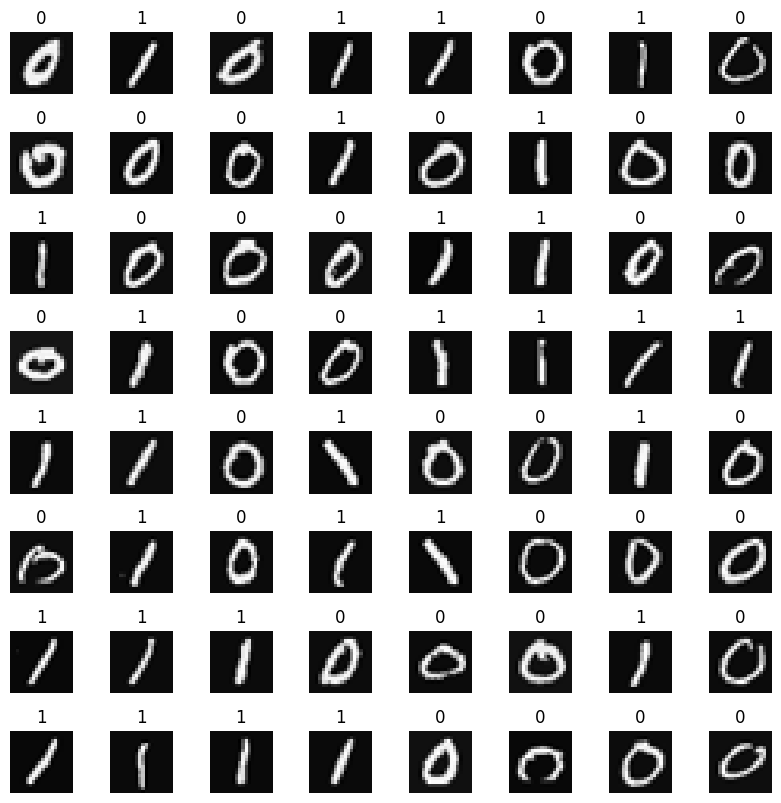

In [29]:
## Outputs random values from the training example and their corresponding target value
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    #Selects random indices
    random_index = np.random.randint(m)

    #Selects rows corresponding to the indices and
    #Reshapes the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    #Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    #Displays the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

## Defines the model

Defines the layers in the model, the number of units and the activarion function to be used in each layer

In [30]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='linear')
], name='my_model' 
)

## Visualizing the model

This outputs the exact implementations going on in the functions in the tensorFlow package used above

In [34]:
# To be implemented 
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Cost Specification

This specifies the cost function to be used to train the model on the training data 

The from_logits parameter set to true shows that the last layer in the neural network is binary classification hence tensorFlow uses a more error tolerating sigmoid function as the activation for that layer.

This prevents run-off errors in the calculation

In [46]:
# Imports the BinaryCrossEentropy cost function from tensorFlow
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(
                loss=BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(0.001),
            )

## Trains the Neural Netwok

This trains the model on the training data and the implementation specified in the code

In [47]:
## Trains the model
model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 12ms/step - loss: 7.6272e-06
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 1.8815e-06
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 1.1217e-06
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 9.4931e-07
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 7.6711e-07
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 6.4749e-07
Epoch 7/100
32/32 [==============================] - 0s 11ms/step - loss: 5.6017e-07
Epoch 8/100
32/32 [==============================] - 0s 11ms/step - loss: 4.9430e-07
Epoch 9/100
32/32 [==============================] - 0s 11ms/step - loss: 4.2018e-07
Epoch 10/100
32/32 [==============================] - 0s 10ms/step - loss: 3.8940e-07
Epoch 11/100
32/32 [==============================] - 0s 10ms/step - loss: 3.3408e-07
Epoch 12/100
32/32 [==============================] - 0s 16ms/step

## Examine parameter shapes 

This outputs the shapes of the parameters that is the weight and bias at each layer of the neural network 

In [48]:
# Extracts the layers in the model
[layer1, layer2, layer3] = model.layers
# Gets the shape at each layer of the neural network
w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()

print(f'W1 shape {w1.shape},  b1 shape: {b1.shape}')
print(f'W2 shape: {w2.shape}, b2 shape: {b2.shape}')
print(f'W3 shape: {w3.shape}, b3 shape: {b3.shape}')

W1 shape (400, 25),  b1 shape: (25,)
W2 shape: (25, 15), b2 shape: (15,)
W3 shape: (15, 1), b3 shape: (1,)


## Visualize the parameters at a specified layer

This outputs the parameters in a specified layer

The layer can be modified to access the exact parameters of interest

In [49]:
# Prints the parameters in the second (2nd) layer

print(model.layers[2].weights)

[<tf.Variable 'dense_5/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.58361554],
       [-0.39537498],
       [-0.55256593],
       [-0.34096155],
       [-0.39892316],
       [ 0.62614787],
       [-0.21366669],
       [ 0.9273994 ],
       [-0.02261111],
       [-0.74027586],
       [ 0.7868412 ],
       [-0.4294077 ],
       [-0.65162814],
       [ 0.15956241],
       [ 0.9901886 ]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.17170075], dtype=float32)>]


## Prediction

Makes prediction on  the trained data using the learnt parameters

DISCLIAMER: The output of the prediction method from tensorFlow is not a probability but rather a large number hence the need to use the tf.nn.sigmoid(prediction) to get the probabilistic version of the value.

This value can now be used with the metrics to find the predicted value

In [52]:
# Predictes the value of some specified training examples in the training data

prediction = model.predict(X[0].reshape(1,400)) # Zero
prediction = tf.nn.sigmoid(prediction)
print(f'Predicting a zero: {prediction}')

'''
prediction = model.predict(X[500].reshape(1,400)) # One
prediction = tf.nn.sigmoid(prediction)
print(f'Predicting a one: {prediction}')
'''

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0

print(f'The prediction after the threshoild: {yhat}')

1/1 [==============================] - 0s 45ms/step
Predicting a zero: [[2.8598258e-14]]
The prediction after the threshoild: 0


## Prediction continuation

Run the prediction on the entire training data

In [58]:
#Runs the prediction on the entire training data
prediction = model.predict(X)

prediction_prob = tf.nn.sigmoid(prediction).numpy()

#print(prediction_prob)

# Applies the prediction threshold to all the predictions at ones
Prediction = (prediction_prob >= 0.5).astype(int)
#print(Prediction)

print(f'Predict a zero {Prediction[0]}, Predict a one {Prediction[500]}')


32/32 [==============================] - 0s 10ms/step
Predict a zero [0], Predict a one [1]


## Visualizing the predicted values and the target values

This prints the images of some random handwritten digits in the training data and match them against their target value and the predicted value

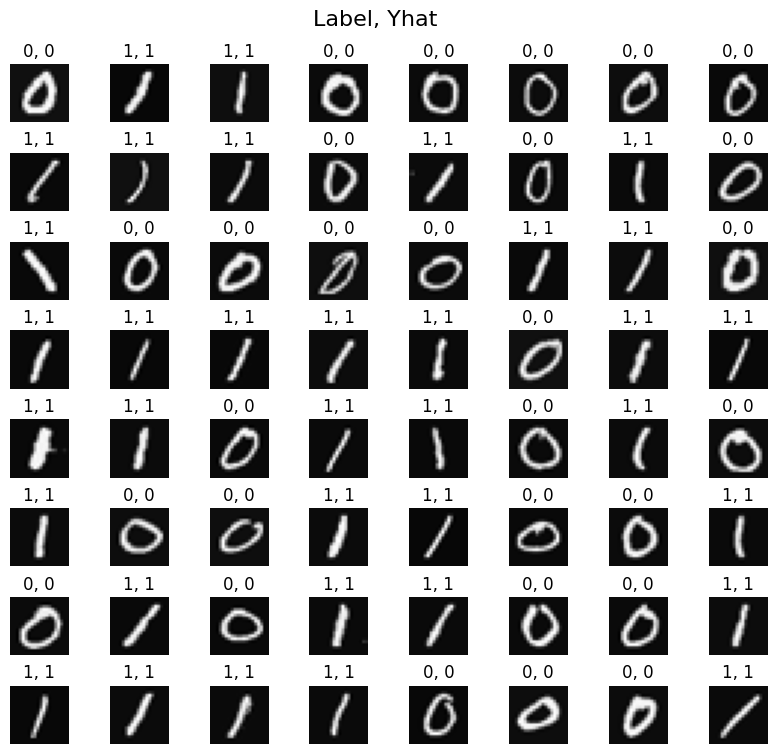

In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    # Selects the row corresponding ton the random index and
    # Reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f'{y[random_index, 0]}, {Prediction[random_index, 0]}')
    ax.set_axis_off()

fig.suptitle('Label, Yhat', fontsize=16)
plt.show()

## Non-classified image

This outputs a non-classified image in the training data

In [69]:
'''
fig = plt.figure(figsize=(1,1))
errors = np.where(y != Prediction)
print(errors)

random_index = errors[0][0]
X_randon_index_reshape = X[random_index].reshape((20,20)).T
plt.imshw(X_randon_index_reshape, cmap='gray')
plt.set_title(f'{y[random_index, 0]}, {Prediction[random_index, 0]}')
plt.axis('off')
plt.show()
'''

"\nfig = plt.figure(figsize=(1,1))\nerrors = np.where(y != Prediction)\nprint(errors)\n\nrandom_index = errors[0][0]\nX_randon_index_reshape = X[random_index].reshape((20,20)).T\nplt.imshw(X_randon_index_reshape, cmap='gray')\nplt.set_title(f'{y[random_index, 0]}, {Prediction[random_index, 0]}')\nplt.axis('off')\nplt.show()\n"